## How to generate Synthetic Data with Rendered.AI's API

This notebook demonstrates how to install anatools, get workspace information, create/modify graphs, create datasets,  download datasets, and display the images and image masks. The satrgb channel is being used for all these examples. 

### Table of Contents:
- [1. Download anatools and set up imports to run the Notebook](#1)
- [2. Log into Anaclient via SDK](#2)
- [3. Get information about available workspaces](#3)
- [4. Get information about existing graphs](#4)
- [5. Get information about existing datasets](#5)
- [6. Download the tutorial graph](#6)
- [7. Download the tutorial dataset](#7)
- [8. Modify the tuturial graph to generate a new one](#8)
- [9. Create a new dataset from the modified graph](#9)
- [10. Image comparison of original vs modified tutorial datasets](#10)
- [11. Image comparison of the original vs modified image masks](#11)

Notes for todos: 
- Add images from UI to help explain what each API call relates to. Can put images into the markdown.
- Add more information under the headings

### 1. Install [anatools from pypi](https://pypi.org/project/anatools/)  <a class="anchor" id="1"></a>
This is the Rendered.AI API that allows users with existing credentials to do anything the UI does.

In [1]:
pip install anatools

     |████████████████████████████████| 146 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 6.5 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 458 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 4.1 MB/s eta 0:00:011
     |████████████████████████████████| 454 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 446 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 5.7 MB/s  eta 0:00:01
     |████████████████████████████████| 198 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 155 k

     |████████████████████████████████| 90 kB 6.5 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 121 kB 7.8 MB/s eta 0:00:01
  Created wheel for gcloud: filename=gcloud-0.18.3-py3-none-any.whl size=602936 sha256=f0443832e01249d2b06ba0aa2c5bbbe97266f4551de739464668fef329a44512
  Stored in directory: /root/.cache/pip/wheels/50/9d/19/dc1a639905431252dbf8a61388a83459c5cfef7add445bebe4
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=498628 sha256=e403bfe3c7dda689ce14d2261f970898e8787d08b575936253ade82e267400c1
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77212 sha256=da21e9f832e5d2b0891af6228bc4a80c9e616adfba089bf2e48388171c1531ae
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147a

### 1B. Install other packages required for this Notebook

In [3]:
print("Hello")

Hello
  Using cached anatools-1.0.3-py3-none-any.whl (16 kB)
  Using cached Pyrebase-3.0.27-py3-none-any.whl (9.6 kB)
  Using cached pycryptodome-3.4.3.tar.gz (6.5 MB)
  Running setup.py clean for pycryptodome
Failed to build pycryptodome
    Running setup.py install for pycryptodome: started
    Running setup.py install for pycryptodome: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Natha\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Natha\\AppData\\Local\\Temp\\pip-install-4kjrc_h3\\pycryptodome\\setup.py'"'"'; __file__='"'"'C:\\Users\\Natha\\AppData\\Local\\Temp\\pip-install-4kjrc_h3\\pycryptodome\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Natha\AppData\Local\Temp\pip-wheel-o_bhv9_e'
       cwd: C:\Users\Natha\AppData\Local\Temp\pip-install-4kjrc_h3\pycryptodome\
  Complete output (364 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Crypto
  copying lib\Crypto\__init__.py -> build\lib.win-amd64-3.8\Crypto
  creating build\lib.win-amd64-3.8\Crypto\Cipher
  copying lib\Crypto\Cipher\AES.py -

In [3]:
pip install numpy matplotlib

     |████████████████████████████████| 10.3 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 8.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### 1C. Set up imports
These imports are required for this Notebook to run.

In [4]:
import anatools
from zipfile import ZipFile
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import json

### 2. Set up the AnaClient with your email  <a class="anchor" id="2"></a>
This step is equivalent to logging into the production environment of the Rendered.AI Ecosystem. 

In [5]:
ana = anatools.AnaClient(email='nathan@rendered.ai', environment='prod')

Enter your password for nathan@rendered.ai the Ana.
········


### 3. Look at what workspaces are available to work out of  <a class="anchor" id="3"></a>
Looking at available workspaces allows for the user to choose which workspace to work out of when creating new graphs and datasets. Here, we are choosing the tutorial workspace.

In [6]:
ana.get_workspaces()

[{'workspaceid': '09748a0dd356e7cad277e9a13814a8cc',
  'name': 'renderedai',
  'owner': 'ethan@rendered.ai'},
 {'workspaceid': '61b8569a-e2e5-4f89-ba1d-0577c372e81d',
  'name': 'TomDemoEnvironment',
  'owner': 'tom@rendered.ai'},
 {'workspaceid': '63184263-2942-4517-a0d0-d84e5626d9cc',
  'name': 'Riverside',
  'owner': 'nathan@rendered.ai'},
 {'workspaceid': '66df1452-5fd6-4210-af67-5a0607f0efe5',
  'name': 'Rendered Team Competition - May 2021',
  'owner': 'lucy@rendered.ai'},
 {'workspaceid': '772c9218-0c6f-4ac3-a92d-b4b7b12b569d',
  'name': 'EclipseWorkspace',
  'owner': 'nathan@rendered.ai'},
 {'workspaceid': 'SgDJwZKLmxOU2FRrCR9nIGlrulv1',
  'name': 'default_SgDJwZKLmxOU2FRrCR9nIGlrulv1',
  'owner': 'ethan@rendered.ai'},
 {'workspaceid': 'ad91e20d-c41d-4e3d-a782-64c6646c751e',
  'name': 'Demo',
  'owner': 'nathan@rendered.ai'},
 {'workspaceid': 'c9b8fcc9-03d9-4c2b-97a3-395b27dec720',
  'name': 'Demo',
  'owner': 'ethan@rendered.ai'},
 {'workspaceid': 'lW3N4EukyKcBEVN6DdNctcxnKVg2'

### 3B. Choose the Riverside Workspace

In [11]:
workspace_id = '63184263-2942-4517-a0d0-d84e5626d9cc'

### 4. Get information about the graphs that exist in the Riverside workspace  <a class="anchor" id="4"></a>
Getting information about graphs allows the user to see what graphs have been previously created in the workspace. 

In [10]:
ana.get_graphs(workspaceid=workspace_id)

[{'graphid': '29786242-0a82-4b88-8cb2-b74171b69d09',
  'name': 'FirstExample.001',
  'serial': '0',
  'channel': 'efb27f0c7ac1cff26361357ea7b6a56c',
  'owner': 'nathan@rendered.ai',
  'description': None},
 {'graphid': '3946683d-3a8c-472b-ab5c-b2b3bc1f48c9',
  'name': 'Pink-Cars',
  'serial': '1',
  'channel': 'efb27f0c7ac1cff26361357ea7b6a56c',
  'owner': 'sam@rendered.ai',
  'description': None},
 {'graphid': '5e448b10-fae8-4c73-98a0-3e2df45681c5',
  'name': 'PinkCars2',
  'serial': '0',
  'channel': 'efb27f0c7ac1cff26361357ea7b6a56c',
  'owner': 'nathan@rendered.ai',
  'description': None},
 {'graphid': 'a6a50157-3b14-4247-b1e7-bc98d3b11b1a',
  'name': 'Orange-Cars.001',
  'serial': '1',
  'channel': 'efb27f0c7ac1cff26361357ea7b6a56c',
  'owner': 'sam@rendered.ai',
  'description': None},
 {'graphid': 'e0930351-6bc4-45e1-b09b-370922877679',
  'name': 'Wide-Cars',
  'serial': '1',
  'channel': 'efb27f0c7ac1cff26361357ea7b6a56c',
  'owner': 'nathan@rendered.ai',
  'description': None}

### 5. Get information about the datasets that exist in the Riverside workspace  <a class="anchor" id="5"></a>
Getting information about datasets allows the user to see what datasets, or jobs, are in the workspace. The status shows if a dataset is currently queued, running, complete, or if the run failed. Completed datasets can get downloaded so the user can view images. 

In [11]:
ana.get_datasets(workspaceid=workspace_id)

[{'datasetid': '2fc66ced-4872-456c-993a-9eef054ebd32',
  'serial': '000',
  'owner': 'nathan@rendered.ai',
  'channel': 'satrgb',
  'description': '',
  'status': 'complete'},
 {'datasetid': 'af4482e4-fef8-4937-9e64-d6b2eb65654e',
  'serial': '000',
  'owner': 'sam@rendered.ai',
  'channel': 'satrgb',
  'description': '',
  'status': 'complete'},
 {'datasetid': 'b9bf9c9b-d9db-4f49-895a-242ae2233d52',
  'serial': '000',
  'owner': 'sam@rendered.ai',
  'channel': 'satrgb',
  'description': '',
  'status': 'complete'}]

### 6. Download a particular graph  <a class="anchor" id="6"></a>
This is an example graph that is being used for the tutorial. It has been pre-generated with the SATRGB channel to randomly place 4 orange convertible cars within a parking lot. Downloading this graph allows the user to view the node setup that can get modified by creating a new graph.

In [12]:
graph_id ='a6a50157-3b14-4247-b1e7-bc98d3b11b1a'
ana.download_graph(workspaceid=workspace_id, graphid=graph_id)

{'nodes': {'fZIWGPczkONYoCthjRUT': {'class': 'ColorVariationModifier',
   'inputs': {'rgba_values': '[200,45,12,1]',
    'color_range': 10,
    'mix_percent': 1,
    'object_generator': {'$list': [{'$link': ['7Mpp8IFns6oOVWtnLFZ6',
        'object_generator']}]}}},
  'n4bNPk4DYri0eD4Za88g': {'class': 'PlaceObjectsRandom',
   'inputs': {'object_generator': {'$list': [{'$link': ['fZIWGPczkONYoCthjRUT',
        'object_generator']}]},
    'background_generator': {'$list': [{'$link': ['DOi8mI3VOY4rpF6Tk1Wt',
        'background_generator']}]},
    'instances_per_factory': 1}},
  '7Mpp8IFns6oOVWtnLFZ6': {'class': 'Convertible_Red', 'inputs': {}},
  'DOi8mI3VOY4rpF6Tk1Wt': {'class': 'ParkingArea2d',
   'inputs': {'name': 'albany_or'}},
  'L5hrwOXKUOgilwnXWC3E': {'class': 'Sensor',
   'inputs': {'look_angle': 0,
    'azimuth': 180,
    'gsd_at_nadir': 0.3,
    'image_size_x': 512,
    'image_size_y': 512}},
  'KN51cKlBdbaXPxmMPddC': {'class': 'AimSensor',
   'inputs': {'scene': {'$list': [{'$

### 7. Download the dataset for this graph <a class="anchor" id="7"></a>
Downloading an existing dataset allows the user to view images, masks, metadata, and the matching graph in yaml format associated with the dataset. The download_dataset API allows the user to download a zip file.

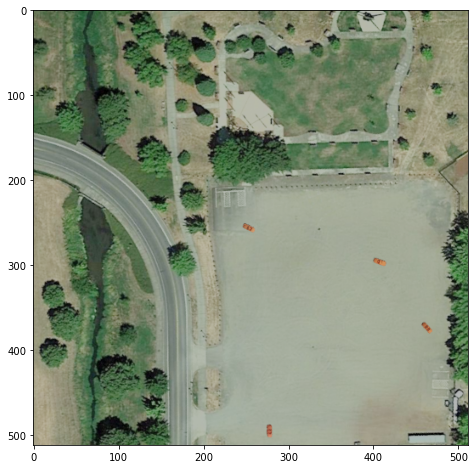

In [12]:
dataset_id = 'af4482e4-fef8-4937-9e64-d6b2eb65654e'
original_dataset = ana.download_dataset(workspaceid=workspace_id, datasetid=dataset_id)

zf = ZipFile(original_dataset, 'r')
zf.extractall(original_dataset.split('.')[0])
zf.close()

orange_car_image = Image.open(glob.glob(original_dataset.split('.')[0]+"/output/images/*.png")[0], 'r')
plt.figure(figsize = (8,8))
plt.imshow(np.asarray(orange_car_image))



### 8. Create a new graph with different RGB values for the car color   <a class="anchor" id="8"></a>
This step shows how easy it is to modify something like the color of the cars and create a brand new graph and associated dataset with the Rendered.AI API. In this case, the cars will become pink.

In [34]:
ana.set_workspace(workspaceid=workspace_id)

graph_json = {'nodes': {'giicgkU2oa5HeX5jQy1k': {'class': 'ColorVariationModifier',
   'inputs': {'rgba_values': '[202,44,146,1]',
    'color_range': 10,
    'mix_percent': 1,
    'object_generator': {'$list': [{'$link': ['nZCjfqbgAwU18FcwIub5',
        'object_generator']}]}}},
  'nZCjfqbgAwU18FcwIub5': {'class': 'Convertible_Red', 'inputs': {}},
  'KSfI45KkdfOXlckPPgYP': {'class': 'ParkingArea2d',
   'inputs': {'name': 'albany_or'}},
  'Lh0UeyAdTW61P4TswqIc': {'class': 'Sensor',
   'inputs': {'look_angle': 0,
    'azimuth': 180,
    'gsd_at_nadir': 0.3,
    'image_size_x': 512,
    'image_size_y': 512}},
  'SSNpABrhR3GZPhNeW8Zt': {'class': 'PlaceObjectsRandom',
   'inputs': {'object_generator': {'$list': [{'$link': ['giicgkU2oa5HeX5jQy1k',
        'object_generator']}]},
    'background_generator': {'$list': [{'$link': ['KSfI45KkdfOXlckPPgYP',
        'background_generator']}]},
    'instances_per_factory': 1}},
  'yJZ1Q5MShx1Nf6jusXwq': {'class': 'AimSensor',
   'inputs': {'scene': {'$list': [{'$link': ['SSNpABrhR3GZPhNeW8Zt',
        'scene']}]},
    'sensor': {'$list': [{'$link': ['Lh0UeyAdTW61P4TswqIc', 'sensor']}]},
    'target_location': None,
    'rotation': 0,
    'x_offset': 0,
    'y_offset': 0}},
  '2D0betoMgUahUJ1aS2WD': {'class': 'Render',
   'inputs': {'scene': {'$list': [{'$link': ['yJZ1Q5MShx1Nf6jusXwq',
        'scene']}]}}}}}



new_graph = ana.create_graph(name='Pink-Cars', channel='satrgb', graph=graph_json, workspaceid=workspace_id)



### 9. Create a new dataset with the updated graph <a class="anchor" id="9"></a>
Create a new dataset with the newly created graph. This step will start off a new run with the graph, while the rest of the steps show the same dataset that is already generated. 

In [36]:
monitor_dataset = ana.create_dataset(name='Pink-Cars-Dataset', graphid=new_graph, workspaceid=workspace_id, interpretations='1', seed='1', priority='1')

### 9B. Monitor and download this new dataset once job is finished 
Monitoring a dataset is easy with the get_datasets API call. Once a dataset has been created, a job will start and it can be monitored in this way. The user can check the status of the job.

In [37]:
ana.get_datasets(workspaceid=workspace_id, datasetid=monitor_dataset)

[{'datasetid': 'b9bf9c9b-d9db-4f49-895a-242ae2233d52',
  'serial': '000',
  'owner': 'sam@rendered.ai',
  'channel': 'satrgb',
  'description': '',
  'status': 'queued'}]

### 10. View the new images and compare with the original  <a class="anchor" id="10"></a>
This steps shows how the new dataset looks compared to the original. As the images below show, the user can see how the car colors are now different and also are in different positions. 

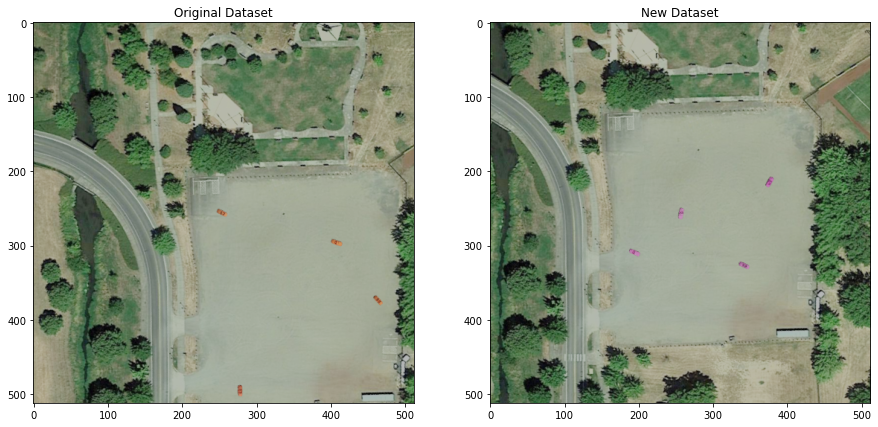

In [13]:
new_dataset_id = 'b9bf9c9b-d9db-4f49-895a-242ae2233d52'
new_dataset = ana.download_dataset(workspaceid=workspace_id, datasetid=new_dataset_id)

zf = ZipFile(new_dataset, 'r')
zf.extractall(new_dataset.split('.')[0])
zf.close()

pink_car_image = Image.open(glob.glob(new_dataset.split('.')[0]+"/output/images/*.png")[0], 'r')

f = plt.figure(figsize=(15, 15))

orig = f.add_subplot(1,2, 1)
plt.imshow(np.asarray(orange_car_image))

new = f.add_subplot(1,2, 2)
plt.imshow(np.asarray(pink_car_image))

orig.title.set_text('Original Dataset')
new.title.set_text('New Dataset')
plt.show(block=True)

### 11. View Image Masks <a class="anchor" id="11"></a>
The downloaded dataset directory comes with image masks that show how the placement of the objects match the generated  images. 

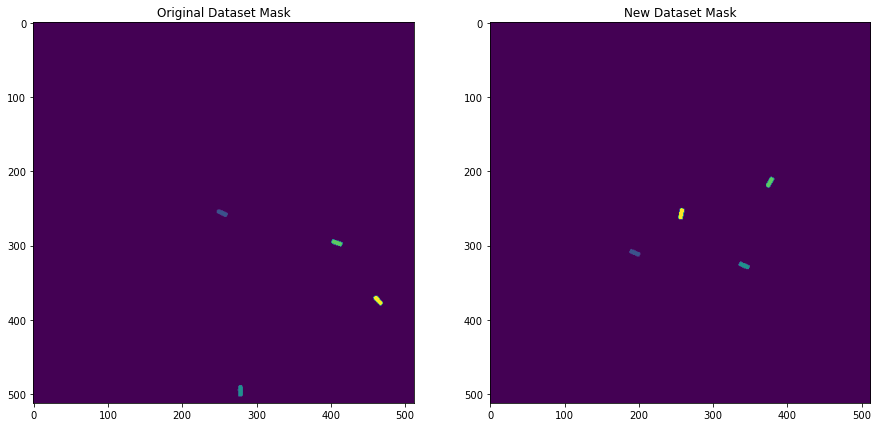

In [14]:
orange_car_image_mask = Image.open(glob.glob(original_dataset.split('.')[0]+"/output/masks/*.png")[0], 'r')
pink_car_image_mask = Image.open(glob.glob(new_dataset.split('.')[0]+"/output/masks/*.png")[0], 'r')

f = plt.figure(figsize=(15, 15))

orig = f.add_subplot(1,2, 1)
plt.imshow(np.asarray(orange_car_image_mask))

new = f.add_subplot(1,2, 2)
plt.imshow(np.asarray(pink_car_image_mask))

orig.title.set_text('Original Dataset Mask')
new.title.set_text('New Dataset Mask')
plt.show(block=True)